In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
from scipy.stats import chi2_contingency
from itertools import combinations

In [13]:
csv_file_name = "train.csv"
current_dir = os.getcwd() # Get the current working directory
parent_dir = os.path.dirname(current_dir) # Get the parent directory
csv_file_path = os.path.join(parent_dir,".kaggle", csv_file_name)
data = pd.read_csv(csv_file_path)
print("Shape of dataset:", data.shape)
print("="*100)
print(data.head()) # Display the first rows of the DataFrame


Shape of dataset: (20758, 18)
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS     

```This dataset is composed of 20,758 rows and 18 columns. We will analyze the data in more depth below.```

## The structure of the DataFrame

In [25]:
# Get information about data types and the number of non-null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### 🧾 Data **info**

| Column                          | Type     | Description |
|---------------------------------|----------|-------------|
| `id`                            | `int`    | Unique identifier for each record |
| `Gender`                        | `object` | Gender of the individual (`Male`, `Female`) |
| `Age`                           | `float`  | Age of the person (in years) |
| `Height`                        | `float`  | Height in meters |
| `Weight`                        | `float`  | Weight in kilograms |
| `family_history_with_overweight` | `object` | Whether the individual has a family history of overweight (`yes` / `no`) |
| `FAVC`                          | `object` | Frequent consumption of high-calorie food (`yes` / `no`) |
| `FCVC`                          | `float`  | Frequency of vegetable consumption (scale from 1 to 3) |
| `NCP`                           | `float`  | Number of main meals per day |
| `CAEC`                          | `object` | Consumption of food between meals (`no`, `Sometimes`, `Frequently`, `Always`) |
| `SMOKE`                         | `object` | Smoking habit (`yes` / `no`) |
| `CH2O`                          | `float`  | Daily water intake (liters) |
| `SCC`                           | `object` | Monitors daily calorie intake (`yes` / `no`) |
| `FAF`                           | `float`  | Physical activity frequency (hours per week) |
| `TUE`                           | `float`  | Daily screen time (hours) |
| `CALC`                          | `object` | Alcohol consumption frequency (`no`, `Sometimes`, `Frequently`, `Always`) |
| `MTRANS`                        | `object` | Most frequent means of transportation (`Walking`, `Bike`, `Automobile`, `Motorbike`, `Public_Transportation`) |
| `NObeyesdad`                    | `object` | **Target variable:** Obesity level of the individual:<br> - `Insufficient_Weight`<br> - `Normal_Weight`<br> - `Overweight_Level_I`<br> - `Overweight_Level_II`<br> - `Obesity_Type_I`<br> - `Obesity_Type_II`<br> - `Obesity_Type_III` |


## Display null values

In [26]:
print(data.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Show duplicate values

In [27]:
dup = data.duplicated()
print(f"Duplicate (complete) rows: {dup.sum()}")
if dup.sum()>0:
    display(data[dup])



Duplicate (complete) rows: 0


## Numeric variables

In [28]:
print(data.describe())

                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.

-----
| Row     | Meaning                                                                         |
| ------- | -------------------------------------------------------------------------------- |
| `count` | Number of non-null values.                                                      |
| `mean`  | Arithmetic mean (average).                                                      |
| `std`   | Standard deviation (how much the data varies).                                  |
| `min`   | Minimum value.                                                                  |
| `25%`   | 25th percentile (first quartile: 25% of the data falls below this value).       |
| `50%`   | Median (50th percentile).                                                       |
| `75%`   | 75th percentile (third quartile).                                               |
| `max`   | Maximum value.                                                                  |

-----

### 📈 Numerical Feature Distributions

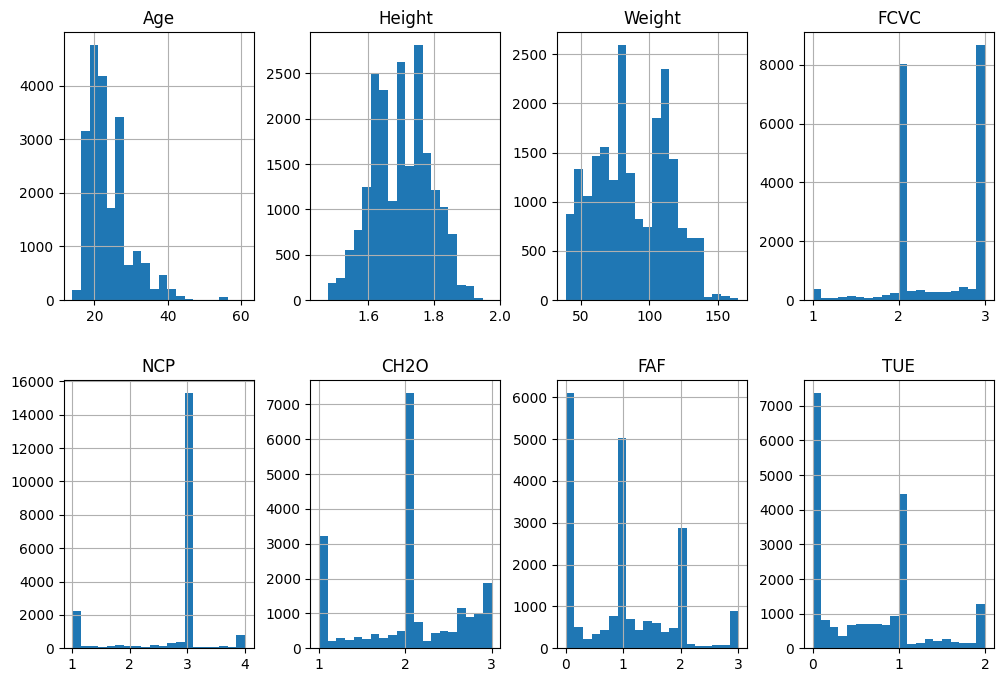

In [29]:
data[num_cols].hist(bins=20, figsize=(12,8), layout=(2,4))
plt.show()


The histograms above illustrate the distribution of key numerical variables in the dataset.

- **Age** is concentrated between 18 and 25, with few older individuals.
- **Weight** shows a bimodal distribution, likely separating healthy and overweight individuals.
- **FAF** (physical activity) and **TUE** (technology use) show that most people report low values.
- **NCP** and **CH2O** display typical daily behavior, with most people having 3 meals and consuming 1–2 units of water.

This analysis helps in identifying patterns, potential outliers, and variables that may require transformation or standardization.


### Correlation heatmap

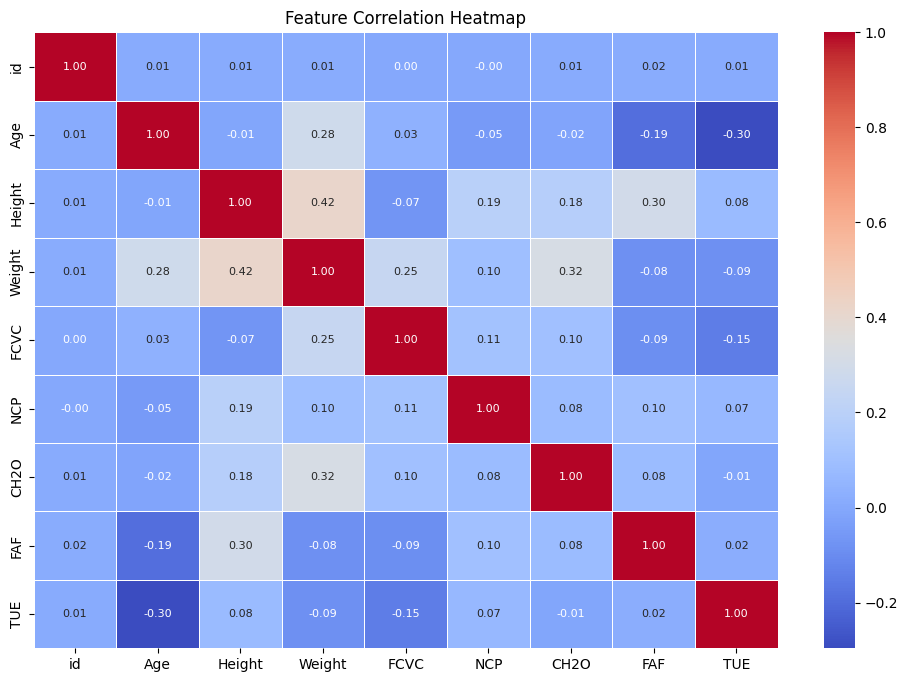

In [30]:
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, linewidths=0.5,
            fmt=".2f", annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap")
plt.show()

### Detailed Interpretation of the Correlation Heatmap

#### Moderate Correlations (0.3 – 0.5)

| Variable Pair         | Correlation | Interpretation                                                                 |
|-----------------------|-------------|---------------------------------------------------------------------------------|
| `Height` - `Weight`   | 0.42        | Taller individuals tend to weigh more. Expected physical relationship.         |
| `Weight` - `CH2O`     | 0.32        | People who drink more water tend to weigh more. Could reflect healthy habits or larger body mass. |
| `Age` - `TUE`         | -0.30       | Older people tend to use technology less. Could reflect lifestyle or generation gaps. |
| `FAF` - `Height`      | 0.30        | Taller individuals are slightly more physically active. Possibly age/lifestyle related. |

#### Weak but Notable Correlations (0.2 – 0.3)

| Variable Pair         | Correlation | Interpretation                                                                 |
|-----------------------|-------------|---------------------------------------------------------------------------------|
| `Age` - `Weight`      | 0.28        | Older individuals tend to weigh more. May be related to metabolism or lifestyle. |
| `Weight` - `FCVC`     | 0.25        | More vegetable consumption weakly correlates with higher weight — potentially counterintuitive; could indicate post-weight-gain dietary changes. |

#### Near-Zero or Negative Correlations

| Variable Pair         | Correlation | Interpretation                                                                 |
|-----------------------|-------------|---------------------------------------------------------------------------------|
| `FCVC` - `FAF`        | -0.09       | Eating vegetables doesn't necessarily correlate with exercising more.          |
| `CH2O` - `TUE`        | -0.01       | Water intake and tech usage are unrelated.                                     |
| `FAF` - `Weight`      | -0.08       | More exercise doesn't necessarily mean lower weight (at least linearly).       |
| `NCP` - Others        | 0.08–0.11   | Number of main meals per day has weak or no linear relationship with others.   |

### Irrelevant Feature: `id`

| Variable | Note                                                                 |
|----------|----------------------------------------------------------------------|
| `id`     | No meaningful correlation with any feature. Just a unique identifier — **should be excluded from modeling**. |

#### 🧠 Key Takeaways

- No extreme correlations — good: **no multicollinearity problems**.
- Some relationships (e.g., Height–Weight, Age–TUE) may help **feature engineering**.
- Health-related variables (`FCVC`, `FAF`, `CH2O`, `NCP`) are **largely independent**, which is great for modeling.

-----


## Object variables

In [31]:
print(data.describe(include='object'))

        Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    20758                          20758  20758      20758  20758  20758   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     10422                          17014  18982      17529  20513  20071   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046  


| Row      | Meaning                                                                                   |
|----------|-------------------------------------------------------------------------------------------|
| `count`  | Number of non-null entries (i.e., how many rows have data for that column).              |
| `unique` | Number of distinct categories (e.g., "Male" and "Female" → 2 unique values).              |
| `top`    | Most frequent (mode) value — the category that appears most often in that column.        |
| `freq`   | Frequency (number of times) the `top` value appears in the dataset.                      |


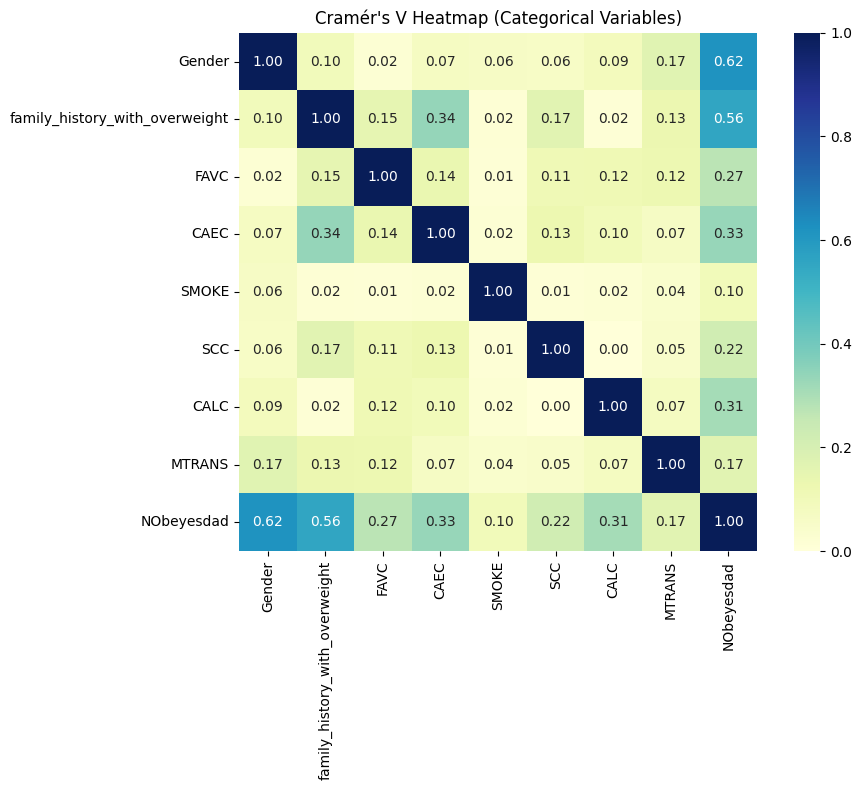

In [37]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
            'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V matrix
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Convert to float
cramers_results = cramers_results.astype(float)

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap="YlGnBu", square=True, fmt=".2f")
plt.title("Cramér's V Heatmap (Categorical Variables)")
plt.tight_layout()
plt.show()

| Variable                         | Cramér's V with `NObeyesdad` | Strength of Association | Interpretation                                                                 |
|----------------------------------|-------------------------------|--------------------------|---------------------------------------------------------------------------------|
| `Gender`                         | 0.62                          | **Strong**               | Gender has a strong association with obesity type. Likely a key predictive feature. |
| `family_history_with_overweight`| 0.56                          | **Moderate–Strong**      | Family history is also very informative — a major risk factor.                |
| `CAEC` (eating between meals)    | 0.33                          | **Moderate**             | Eating habits between meals show a clear impact on obesity class.             |
| `CALC` (alcohol consumption)     | 0.31                          | **Moderate**             | Alcohol use may relate to obesity, likely via calorie intake.                 |
| `FAVC` (high-cal food)           | 0.27                          | **Weak–Moderate**        | High-calorie food contributes but not as strong as other habits.              |
| `SCC` (calorie monitoring)       | 0.22                          | **Weak–Moderate**        | Weak correlation; may reflect health awareness.                               |
| `MTRANS` (transport mode)        | 0.17                          | **Weak**                 | Possibly relates to physical activity, but weak.                              |
| `SMOKE`                          | 0.10                          | **Very Weak**            | Little to no relationship with obesity class.                                 |

### 🔍 Categorical Variable Associations

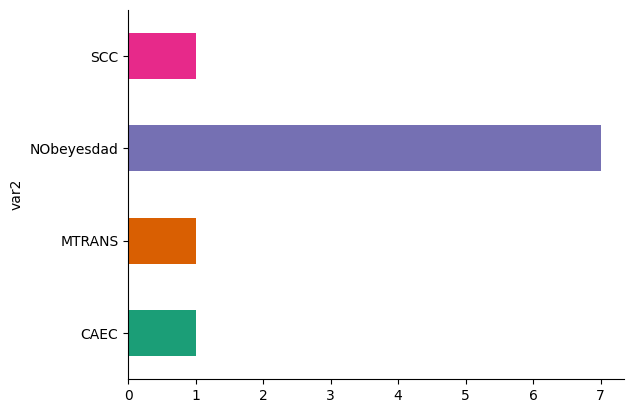

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('var2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The horizontal bar chart shows the strength or importance of categorical variables, possibly in relation to the target (`NObeyesdad`).

- `NObeyesdad` stands out significantly, likely because it is the target variable or has high internal complexity (7 categories).
- `SCC`, `CAEC`, and `MTRANS` have relatively low values, indicating weaker association or predictive value.

This visualization helps prioritize which variables may be more or less influential in the analysis or modeling process.


### 📌 Categorical Feature Importance

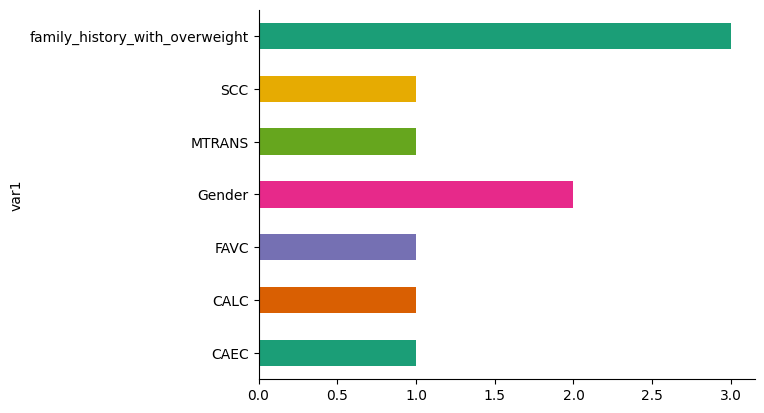

In [42]:
_df_1.groupby('var1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This bar chart shows the relative importance or association of several categorical variables, possibly in relation to the target variable (`NObeyesdad`).

- `family_history_with_overweight` stands out as the most significant feature.
- `Gender` also shows strong association with obesity levels.
- Variables like `SCC`, `MTRANS`, `FAVC`, `CALC`, and `CAEC` are less impactful but may still contribute to model performance.

This analysis helps prioritize which features to focus on in modeling and feature engineering.


### Conclusions

 target variable `Nobeyesdad`
#### Most relevant variables for our model:
`Gender`, `family_history_with_overweight`, `CAEC`, `CALC`.

#### Least useful variables:
`SMOKE` and `MTRANS` provide very little information; you might consider removing them or giving them less weight.

Recommended next step:
Use these relationships to decide which variables to code first and how to prioritize our feature selection.

----
# Hipotesis

H₀: Family history of overweight is independent of the individual's obesity status.

H₁: There is a dependence (association) between family history and obesity.

## Analysis of the target variable (Nobeyesdad)

In [10]:
data['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


### 🎯 Target Variable Distribution – `NObeyesdad`

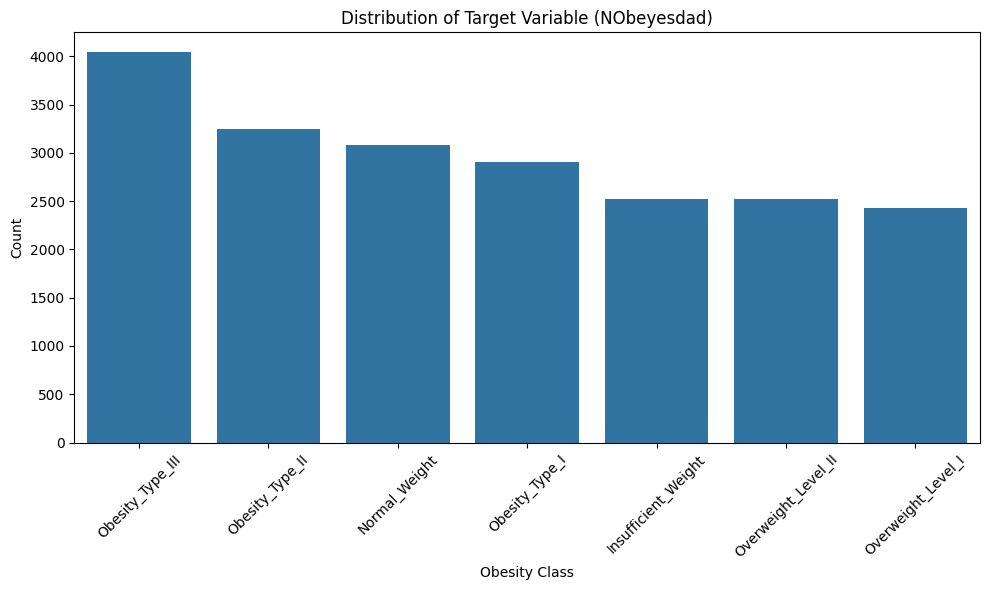

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='NObeyesdad', order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Target Variable (NObeyesdad)')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The bar chart above displays the frequency of each class in the target variable `NObeyesdad`, which represents different obesity categories.

- The dataset includes **7 classes**, confirming this is a **multiclass classification** problem.
- The most common class is **`Obesity_Type_III`**, with over 4,000 records.
- The least represented class is **`Overweight_Level_I`**, with just under 2,500 records.
- While there is some class imbalance, it is not severe. However, it should be monitored during model evaluation.

This distribution helps guide decisions on:
- Model choice and metrics (e.g., using macro-averaged F1-score).
- Whether to use resampling techniques or assign class weights.


### 🧑‍⚕️ Gender Distribution by Obesity Type

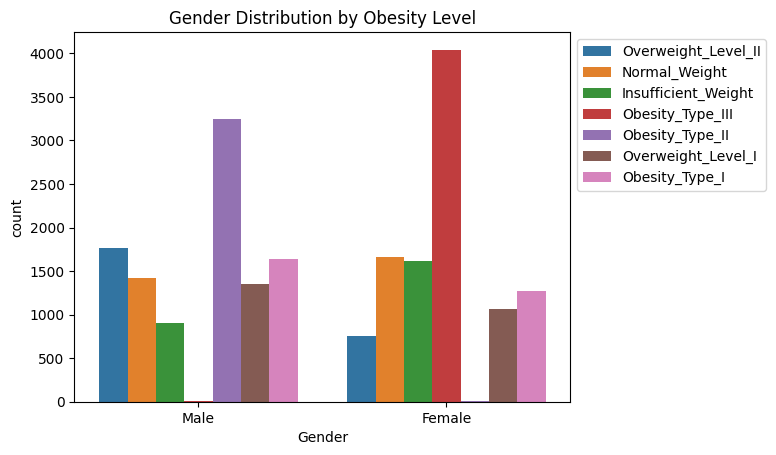

In [12]:
sns.countplot(x='Gender', hue='NObeyesdad', data=data)
plt.title('Gender Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


This bar chart above shows how the different obesity categories (`NObeyesdad`) are distributed by gender.

- `Obesity_Type_III` is significantly more common in females, while `Obesity_Type_II` is more prevalent among males.
- `Normal_Weight` and `Overweight_Level_II` are relatively balanced between genders.
- `Insufficient_Weight` appears more frequently in females.

This suggests that gender may play a role in obesity classification and should be considered as an important predictive feature.


### 🧬 Family History and Obesity Type


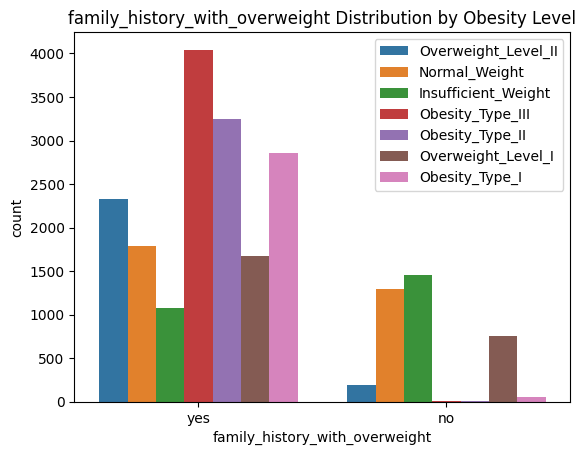

In [13]:
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=data)
plt.title('family_history_with_overweight Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


This chart illustrates the distribution of obesity categories (`NObeyesdad`) based on whether individuals have a family history of overweight.

- Individuals who answered **"yes"** to having family history show much higher rates of obesity types, especially `Obesity_Type_III` and `Obesity_Type_II`.
- In contrast, those with **"no"** history mostly fall into the `Normal_Weight` and `Insufficient_Weight` categories.
- This supports the hypothesis that **family history of overweight is strongly associated with higher obesity levels**, making it a valuable predictor for classification models.


### 🍔 Relationship Between High-Calorie Food Consumption (FAVC) and Obesity Type

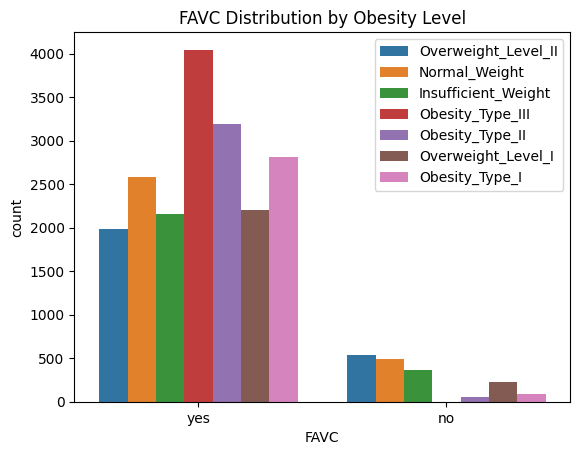

In [14]:
sns.countplot(x='FAVC', hue='NObeyesdad', data=data)
plt.title('FAVC Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This bar chart shows how the type of obesity (`NObeyesdad`) is distributed based on the variable `FAVC` — which indicates whether the individual frequently consumes high-caloric food.

- The vast majority of people who answered **"yes"** fall into obesity categories, especially `Obesity_Type_III`, `Obesity_Type_II`, and `Obesity_Type_I`.
- Very few individuals who answered **"no"** fall into any obesity class.
- This pattern suggests that frequent consumption of high-calorie food is strongly associated with higher obesity levels.

Conclusion: **FAVC is a highly predictive variable** for obesity classification and should be included in any model.


### 🍪 Relationship Between Eating Between Meals (CAEC) and Obesity Type

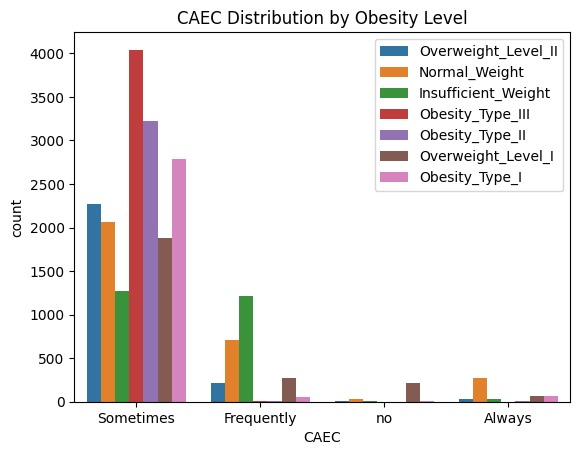

In [15]:
sns.countplot(x='CAEC', hue='NObeyesdad', data=data)
plt.title('CAEC Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This chart shows how obesity categories are distributed based on the frequency of eating between meals (`CAEC`).

- Most obesity cases fall under the **"Sometimes"** category, including the highest counts for `Obesity_Type_III`, `Type_II`, and `Type_I`.
- The `Frequently` group also shows obesity, but surprisingly contains more individuals with `Insufficient_Weight`.
- Very few individuals selected **"Always"** or **"no"**, though obesity still appears among them.

This suggests that eating between meals, even occasionally, may contribute to weight gain — but more extreme habits should be explored further.

### 🚬 Relationship Between Smoking (SMOKE) and Obesity Type

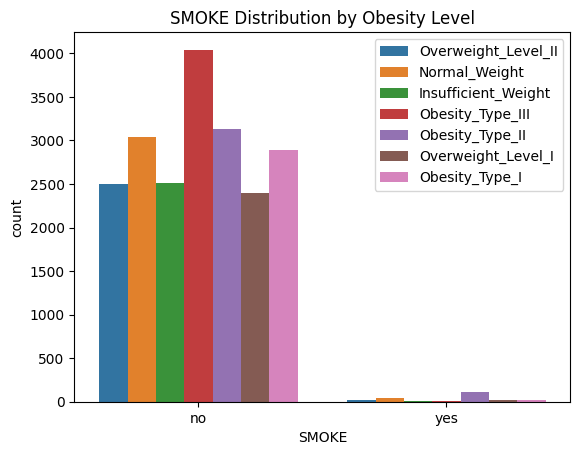

In [16]:
sns.countplot(x='SMOKE', hue='NObeyesdad', data=data)
plt.title('SMOKE Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This chart shows the distribution of obesity categories (`NObeyesdad`) based on smoking status.

- The vast majority of individuals in the dataset are non-smokers.
- Among non-smokers (`no`), all obesity levels are well represented.
- Among smokers (`yes`), the sample size is very small, and no clear pattern emerges.

This suggests that smoking may not be a significant predictor of obesity type in this dataset, at least based on the current distribution.

### 🍷 Alcohol Consumption (CALC) and Obesity Type

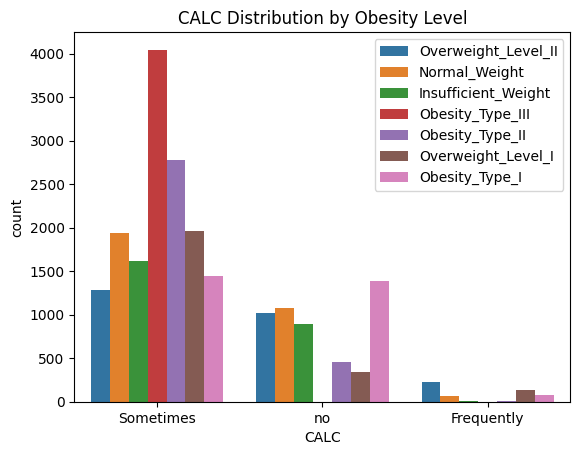

In [17]:
sns.countplot(x='CALC', hue='NObeyesdad', data=data)
plt.title('CALC Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This bar chart shows the distribution of obesity types (`NObeyesdad`) based on alcohol consumption frequency (`CALC`).

- Most individuals fall into the `Sometimes` category, which also contains the highest counts for `Obesity_Type_III`, `Type_II`, and `Type_I`.
- The `no` category shows a relatively high presence of `Obesity_Type_I`, but fewer severe obesity cases.
- Very few individuals reported drinking `Frequently`, so it's hard to draw conclusions from that group.

This suggests that **occasional alcohol consumption is common among all weight categories**, including obese individuals, but further analysis is needed to determine causality or influence.

### 🚶 Transportation Mode (MTRANS) and Obesity Type

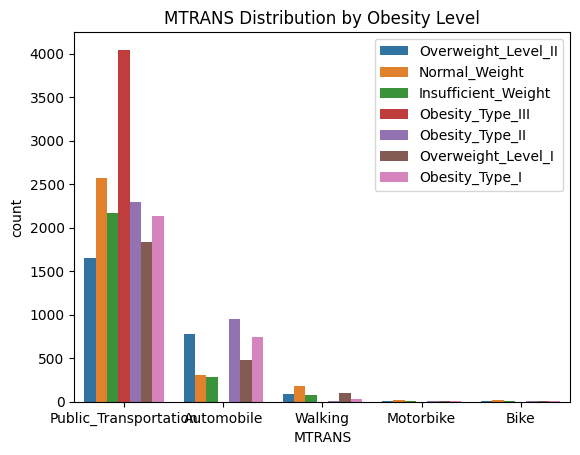

In [18]:
sns.countplot(x='MTRANS', hue='NObeyesdad', data=data)
plt.title('MTRANS Distribution by Obesity Level')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This bar chart shows how obesity types (`NObeyesdad`) are distributed based on individuals' primary mode of transportation (`MTRANS`).

- Most individuals rely on **public transportation**, which also contains the highest number of obesity cases — especially `Obesity_Type_III`.
- Other transportation modes like **automobile** also show some presence of obesity, though less prominently.
- **Walking and biking** are associated with lower obesity levels, but these categories contain very few individuals.

Due to the class imbalance among transportation types, we should be cautious when drawing conclusions. However, the chart hints at a possible relationship between active transport and healthier weight categories.

## Multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data[num_cols])
vif = pd.DataFrame({
    'feature': num_cols,
    'VIF': [variance_inflation_factor(X,i) for i in range(len(num_cols))]
}).sort_values('VIF', ascending=False)
display(vif)


,feature,VIF
2,Weight,1.667031
1,Height,1.504341
0,Age,1.251635
6,FAF,1.201780
3,FCVC,1.155242
5,CH2O,1.141249
7,TUE,1.135816
4,NCP,1.066716


from matplotlib import pyplot as plt
vif['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vif.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vif['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vif['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vif, x='VIF', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_19['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='index', y='VIF', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='VIF', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### 🔎 Multicollinearity Check – Variance Inflation Factor (VIF)

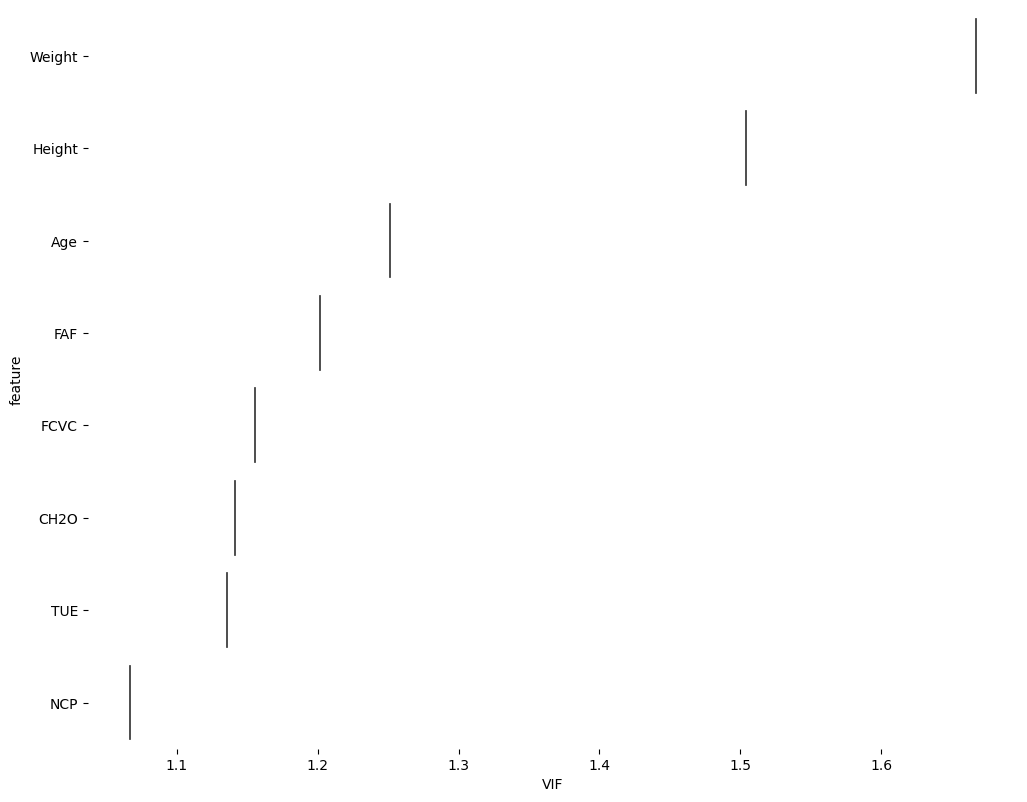

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(vif['feature'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(
    data=vif,
    x='VIF',
    y='feature',
    hue='feature',
    inner='stick',
    palette='Dark2',
    legend=False
)

sns.despine(top=True, right=True, bottom=True, left=True)


The chart shows the VIF scores for all numerical input variables. VIF measures how strongly a variable is linearly related to other variables.

- All variables have VIF values between **1.0 and 1.7**, which indicates **low multicollinearity**.
- No variable exceeds the common threshold of **5**, so no feature removal is necessary based on multicollinearity.

Conclusion: The numerical features are sufficiently independent for modeling purposes.


### 📉 VIF Line Plot – Multicollinearity Check

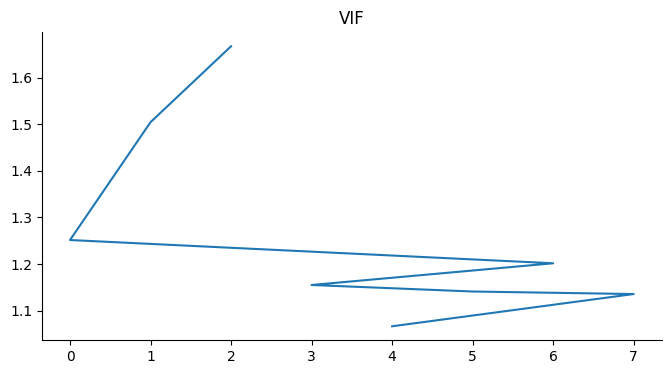

In [46]:
from matplotlib import pyplot as plt
vif['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

This line plot shows the Variance Inflation Factor (VIF) values for numerical features in the dataset.

- All VIF values fall below 2, which indicates **no concerning multicollinearity**.
- The highest VIF is around 1.7, well below the common threshold of 5.

These results confirm that the numerical features are safe to use together in a model without risking multicollinearity issues.


## Dimensionality reduction

### 🎯 t-SNE (or UMAP) Visualization of Obesity Classes

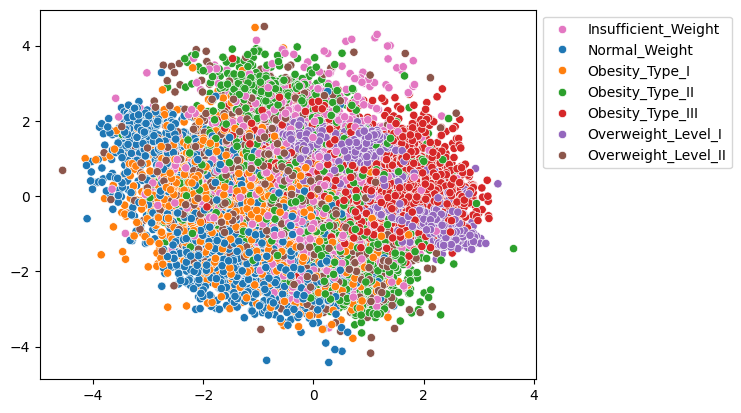

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['NObeyesdad'])
pca = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(data[num_cols]))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=y, palette='tab10')
plt.legend(labels=le.classes_, bbox_to_anchor=(1,1))
plt.show()


The 2D scatter plot above shows a dimensionality reduction of the dataset, colored by the target variable `NObeyesdad`.

- Some classes (e.g., `Obesity_Type_III`, `Normal_Weight`) form distinct clusters.
- Intermediate classes such as `Overweight_Level_I/II` and `Obesity_Type_I/II` show more overlap, suggesting a continuum between weight categories.
- The partial separation between classes indicates that the data contains **learnable patterns** suitable for classification models.

This visualization supports the feasibility of building a multiclass classification model and guides the choice of algorithms.


### 📊 Boxplots by Obesity Level (`NObeyesdad`)

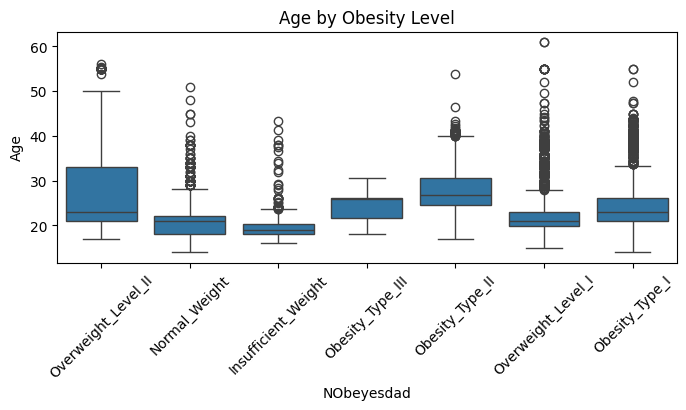

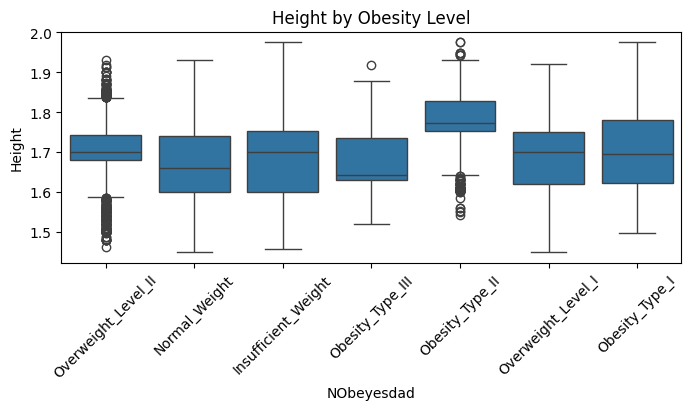

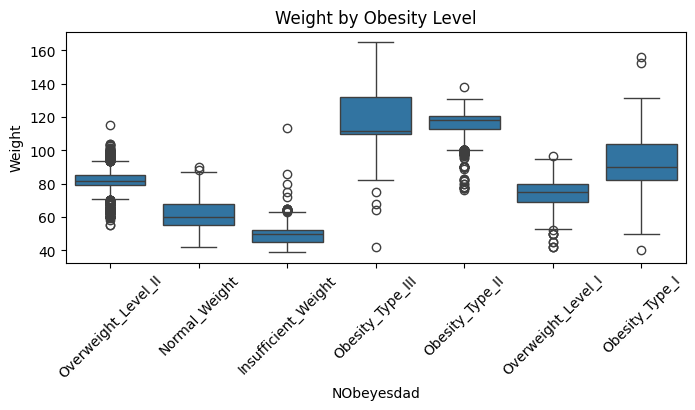

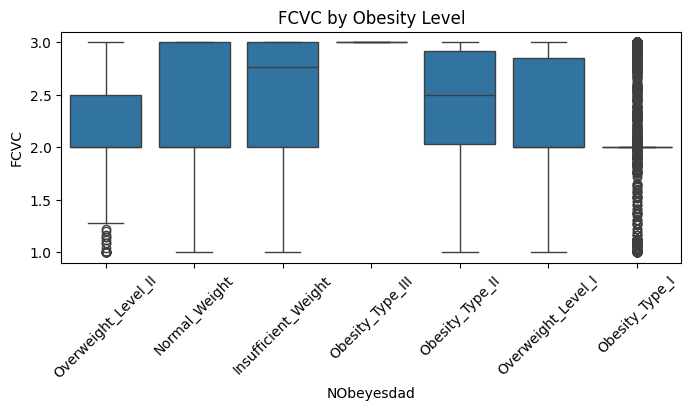

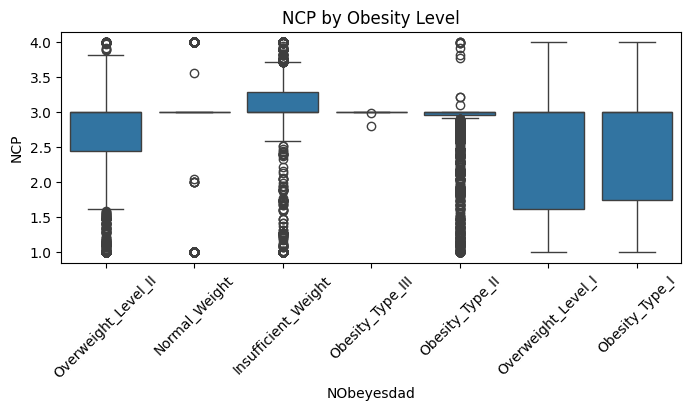

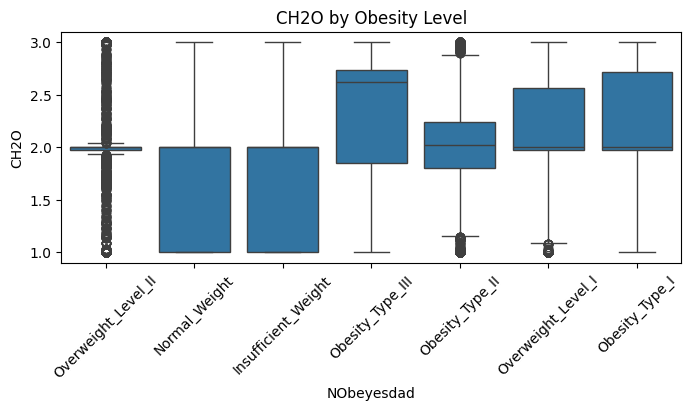

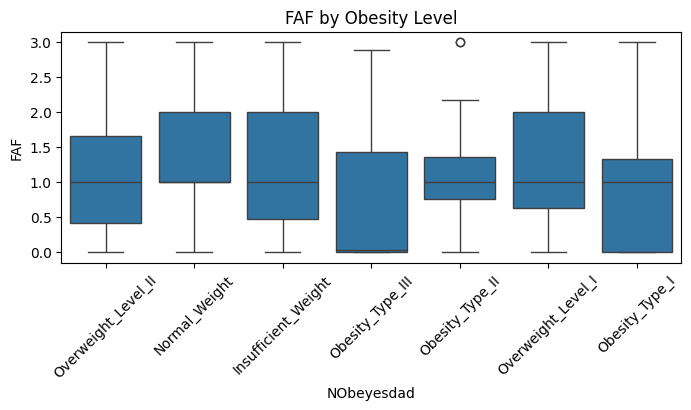

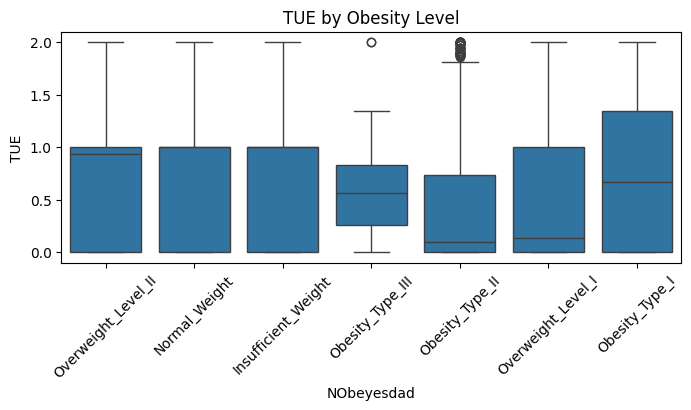

In [19]:
num_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for c in num_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x='NObeyesdad', y=c, data=data)
    plt.title(f"{c} by Obesity Level")
    plt.xticks(rotation=45)
    plt.show()


The boxplots below show the distribution of several numerical variables by obesity class:

- `Weight` and `Age` show clear separation between classes and are likely to be strong predictors.
- `FAF` (physical activity) is generally lower in higher obesity classes.
- `Height` and `TUE` appear to have little discriminative power.
- Outliers are present but do not dominate the distributions.

These visualizations guide feature selection and confirm the usefulness of key health indicators in predicting obesity types.

#### Outlier Detection via Boxplots

Outliers were visually identified in the boxplots across several variables:

- Variables like `Weight`, `Age`, and `Height` show clear extreme values.
- Others, such as `FAF`, `NCP`, and `CH2O`, also contain outliers on both ends.
- These points will be considered in preprocessing to determine whether to cap, transform, or retain them based on their clinical plausibility and impact on model performance.


## cleaning outliers

In [51]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Rows
cols_with_outliers = ['Weight', 'Height', 'Age', 'FAF', 'TUE']

# cleaning
data_cleaned = remove_outliers_iqr(data, cols_with_outliers)


### Boxplots Before and After Removing Outliers (IQR Method)

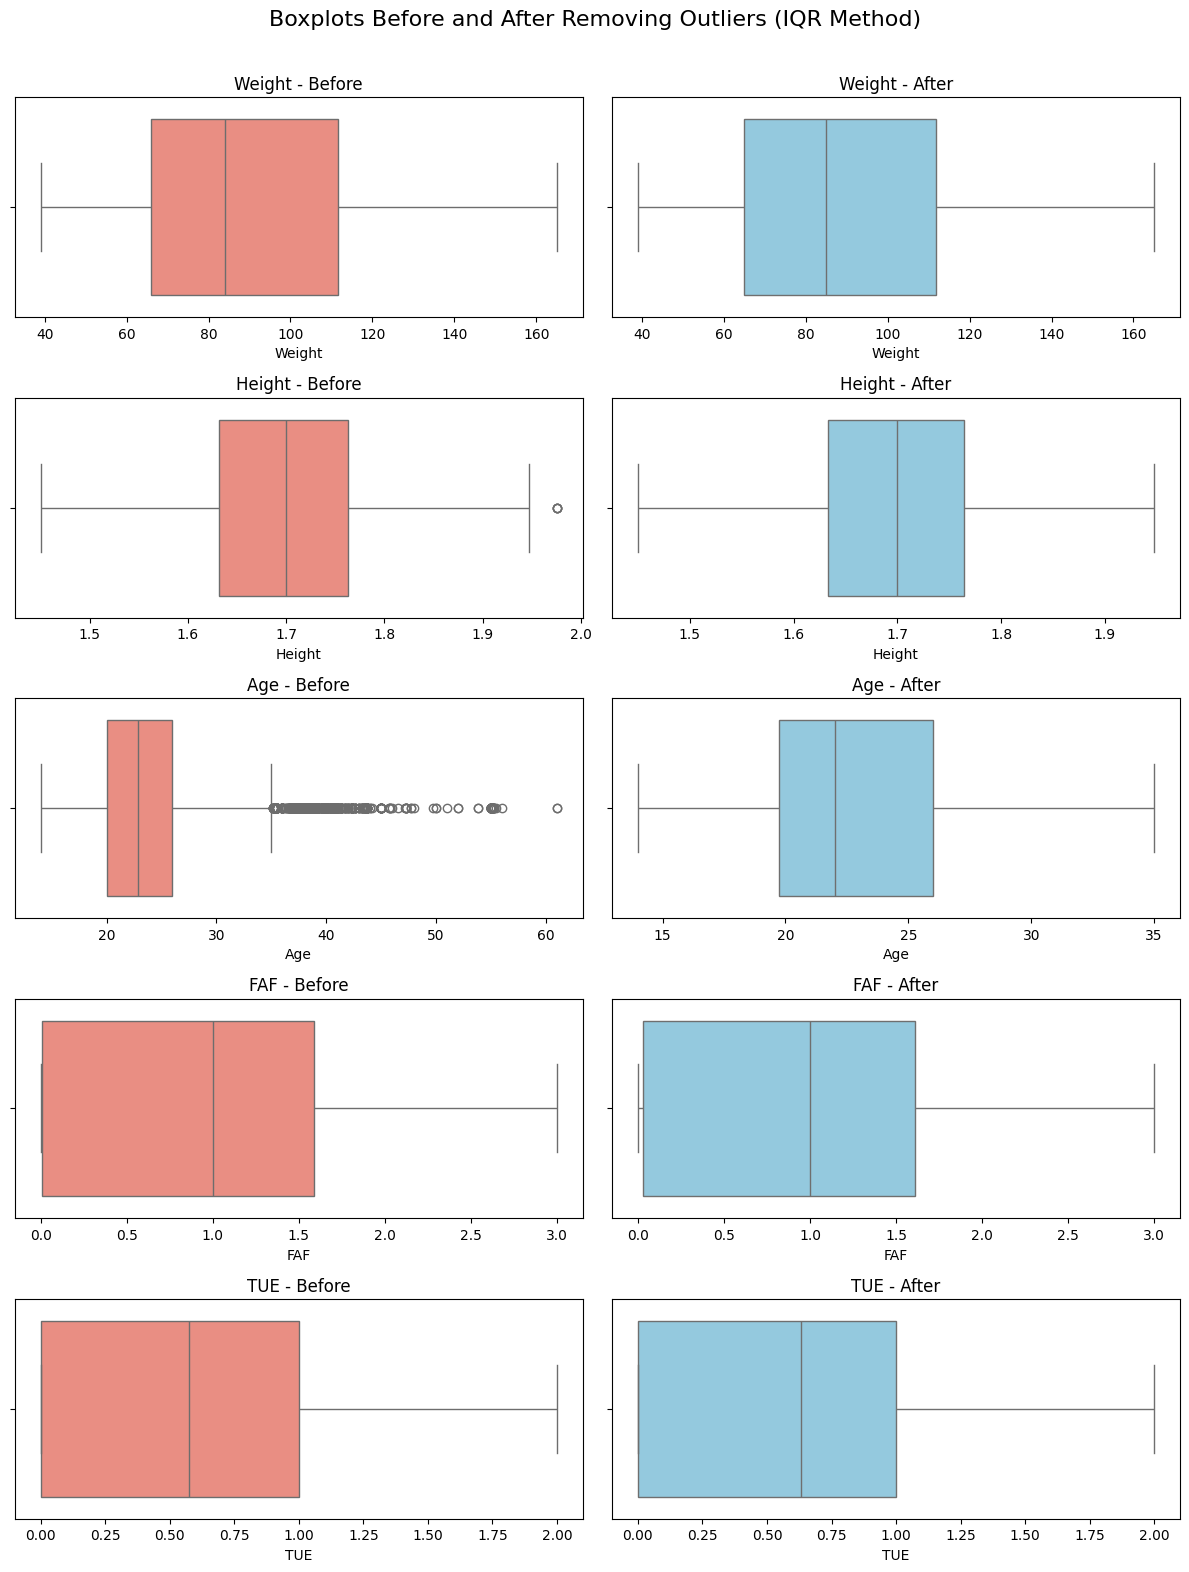

In [53]:
fig, axes = plt.subplots(len(cols_with_outliers), 2, figsize=(12, 16))
fig.suptitle("Boxplots Before and After Removing Outliers (IQR Method)", fontsize=16)

for i, col in enumerate(cols_with_outliers):
    sns.boxplot(ax=axes[i, 0], x=data[col], color="salmon")
    axes[i, 0].set_title(f"{col} - Before")

    sns.boxplot(ax=axes[i, 1], x=data_cleaned[col], color="skyblue")
    axes[i, 1].set_title(f"{col} - After")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 📈 Correlation of Numerical Features with Target

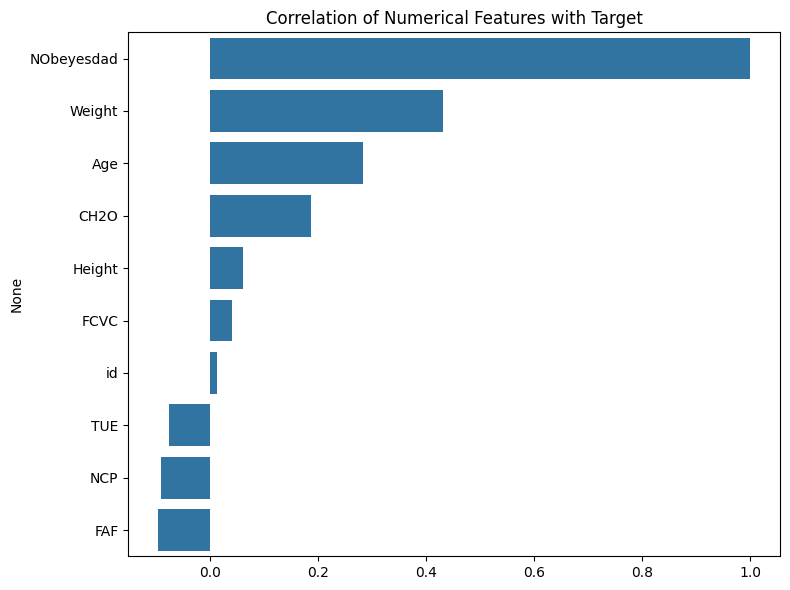

In [56]:
# Create a copy of the numeric data
df_corr = data.copy()

# Encode the target variable as numeric
df_corr['NObeyesdad'] = LabelEncoder().fit_transform(df_corr['NObeyesdad'])

# Calculate correlations
num_cols = df_corr.select_dtypes(include=['float64', 'int']).columns
corr = df_corr[num_cols].corr()['NObeyesdad'].sort_values(ascending=False)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation of Numerical Features with Target')
plt.tight_layout()
plt.show()


This plot shows the Pearson correlation between each numerical feature and the target variable `NObeyesdad` (after encoding).

- `Weight` has the strongest positive correlation (~0.42), making it a highly predictive feature.
- `Age` and `CH2O` show moderate correlations and may contribute useful information.
- Other features such as `Height`, `FCVC`, `FAF`, and `TUE` show very weak linear correlations, but may still be useful in non-linear models.
- The feature `id` shows no meaningful correlation and should be removed from the dataset.

This analysis helps prioritize variables for model training and guides feature selection.


In [59]:
# delete ID
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)
    print("✅ Column 'id' has been removed.")
else:
    print("ℹ️ Column 'id' was not found in the dataset.")


✅ Column 'id' has been removed.


In [63]:
'id' in data.columns

False

---
## 📊 ANOVA Results – Statistical Significance of Numerical Features

In [64]:
import scipy.stats as stats

anova_results = {}
for col in ['Age', 'Height', 'Weight', 'FAF', 'TUE']:
    groups = [data[data['NObeyesdad'] == label][col] for label in data['NObeyesdad'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = p_val

# Show sorted results
pd.Series(anova_results).sort_values()


,0
Age,0.000000e+00
Height,0.000000e+00
Weight,0.000000e+00
FAF,0.000000e+00
TUE,1.424955e-183


A one-way ANOVA test was conducted to determine whether the mean values of several numerical variables differ significantly across obesity classes (`NObeyesdad`).

| Variable | p-value         | Interpretation                                      |
|----------|------------------|-----------------------------------------------------|
| Age      | 0.000000e+00     | ✅ Significant difference in age across classes     |
| Height   | 0.000000e+00     | ✅ Significant difference in height across classes  |
| Weight   | 0.000000e+00     | ✅ Strong predictor – varies clearly between classes|
| FAF      | 0.000000e+00     | ✅ Activity levels differ significantly             |
| TUE      | 1.42e-183        | ✅ Screen time also varies with obesity class       |

These results support the use of these features in the classification model.


In [66]:
# Save the cleaned dataset
data.to_csv("train_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'train_cleaned.csv'")

✅ Cleaned dataset saved as 'train_cleaned.csv'
